# Music Genres from Wikidata
- Using UMAP, we will produce a 2-dimensional scatterplot which shows the embeddings of these words.
- Using cosine similarity, we will also deterime which genre is most similar to Argentine tango

In [1]:
%pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 1.5 MB/s eta 0:00:00


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import umap
import pandas as pd
from sentence_transformers import SentenceTransformer

In [5]:
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [6]:
genres_df = pd.read_html("https://www.wikidata.org/wiki/Wikidata:WikiProject_Music/Lists/Instance_of_music_genre")[0]
genres = genres_df['label'].tolist()
genre_embeddings = pd.DataFrame(embedding_model.encode(genres_df['label'].tolist()))
genre_embeddings = genre_embeddings.assign(text = genres_df['label'].tolist(), )

# Just take the first 50 genres for speed/readability
genre_embeddings = genre_embeddings.head(50)

In [7]:
genre_embeddings.head()

,0,1,2,3,4,5,6,7,8,9,...,375,376,377,378,379,380,381,382,383,text
0,-0.050982,0.036314,-0.018681,0.064923,-0.155699,-0.007342,0.066791,-0.031713,0.002916,-0.092707,...,-0.003042,0.041154,0.098299,-0.036554,0.046602,0.097419,0.023119,0.007499,-0.019451,opera
1,0.002608,-0.017491,0.010264,-0.013854,-0.126910,0.109770,0.073662,-0.037481,0.034074,0.001816,...,-0.008417,-0.072247,0.160962,-0.087497,0.009758,0.076527,0.039773,0.106755,0.028148,musical
2,-0.039175,-0.025080,-0.029659,-0.011583,-0.018167,0.051054,0.127290,-0.029419,0.012948,0.041054,...,-0.001654,-0.075696,0.121836,-0.089039,0.038978,0.056823,-0.083264,0.114786,-0.055849,punk rock
3,0.018308,0.057893,-0.036484,-0.044937,-0.096685,0.101979,0.059316,-0.104192,0.028501,0.049499,...,0.031733,-0.121287,0.033099,-0.044816,0.082672,0.079995,-0.034931,0.058770,-0.061914,music of Israel
4,-0.021784,0.016750,-0.048389,-0.007419,-0.071243,-0.036559,0.175235,0.006926,0.009023,0.042399,...,-0.001618,0.053566,0.088876,-0.052120,-0.047264,0.042486,0.091393,0.078582,-0.010223,conjunto


In [8]:
# Initialize the umap reducer object
reducer = umap.UMAP(n_components=2)
embedding_columns = [c for c in genre_embeddings.columns if c not in ('text', )]
# Fit the reducer
reducer.fit(genre_embeddings[embedding_columns])
# Transform the embeddings (make sure to select only the embedding columns, not the text one)
embeddings_2dim_df = pd.DataFrame(reducer.transform(genre_embeddings[embedding_columns]))
embeddings_2dim_df['text'] = genre_embeddings['text']
embeddings_2dim_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,0,1,text
0,-4.324398,6.768742,opera
1,-5.638092,4.798095,musical
2,-3.763527,3.670589,punk rock
3,-5.658414,5.410611,music of Israel
4,-3.028017,6.591122,conjunto


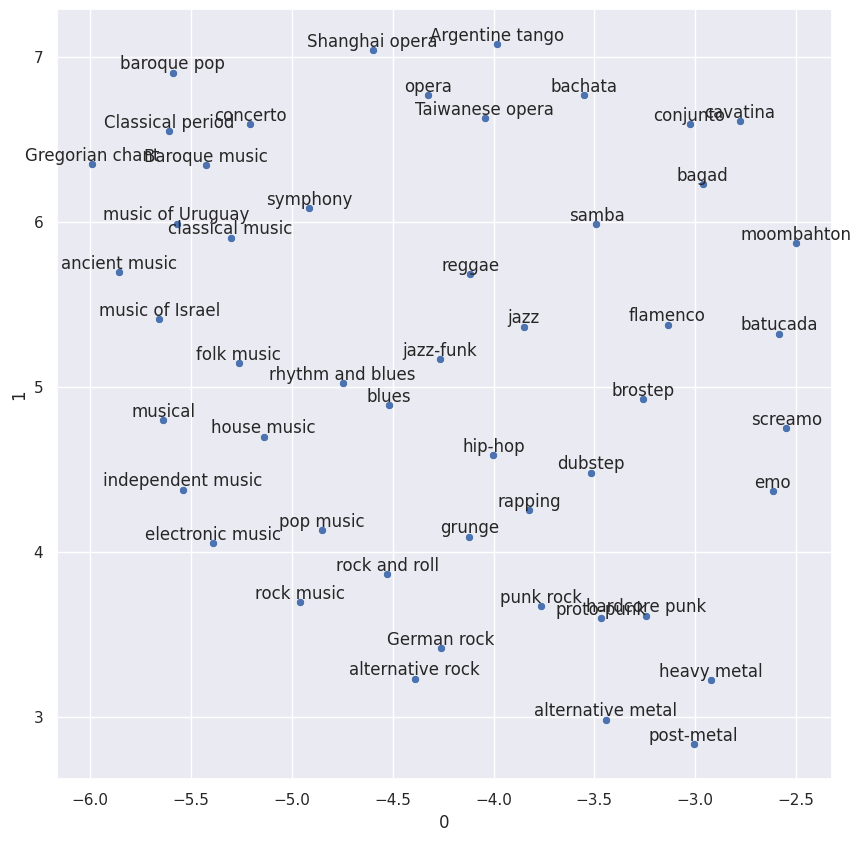

In [14]:
ax = sns.scatterplot(embeddings_2dim_df, x=0, y=1)

sns.set_theme(rc={'figure.figsize':(7, 7)})

for i, row in embeddings_2dim_df.iterrows():
    ax.text(row[0], row[1], row['text'], ha='center', va='bottom')

In [15]:
from sklearn.metrics.pairwise import cosine_similarity


similarity_matrix = cosine_similarity(genre_embeddings[embedding_columns])
similarity_matrix = pd.DataFrame(
    similarity_matrix,
    index = genre_embeddings['text'],
    columns = genre_embeddings['text'],
)
similarity_matrix.head()

text,opera,musical,punk rock,music of Israel,conjunto,rapping,rock and roll,jazz,Baroque music,classical music,...,pop music,jazz-funk,heavy metal,bachata,cavatina,post-metal,independent music,folk music,rhythm and blues,baroque pop
text,,,,,,,,,,,,,,,,,,,,,
opera,1.000000,0.521642,0.229563,0.307693,0.263503,0.145827,0.269890,0.261310,0.431164,0.502843,...,0.357149,0.181396,0.293607,0.383006,0.240294,0.255979,0.308161,0.263731,0.284946,0.435584
musical,0.521642,1.000000,0.469517,0.606184,0.272070,0.417712,0.567829,0.512186,0.569208,0.695227,...,0.616566,0.435339,0.412726,0.376752,0.264201,0.305562,0.612066,0.612771,0.526256,0.530031
punk rock,0.229563,0.469517,1.000000,0.351759,0.129041,0.418003,0.690186,0.412037,0.269167,0.341567,...,0.533609,0.425436,0.410855,0.073621,0.151122,0.373449,0.387770,0.451829,0.396876,0.337460
music of Israel,0.307693,0.606184,0.351759,1.000000,0.106074,0.300343,0.434916,0.445759,0.508359,0.603779,...,0.506862,0.417046,0.266140,0.375819,0.235252,0.198357,0.536994,0.498965,0.438918,0.411733
conjunto,0.263503,0.272070,0.129041,0.106074,1.000000,0.115252,0.116704,0.236331,0.229021,0.211431,...,0.068114,0.170330,0.085575,0.292054,0.396593,0.128965,0.120958,0.189375,0.175141,0.157792


<Axes: xlabel='text', ylabel='text'>

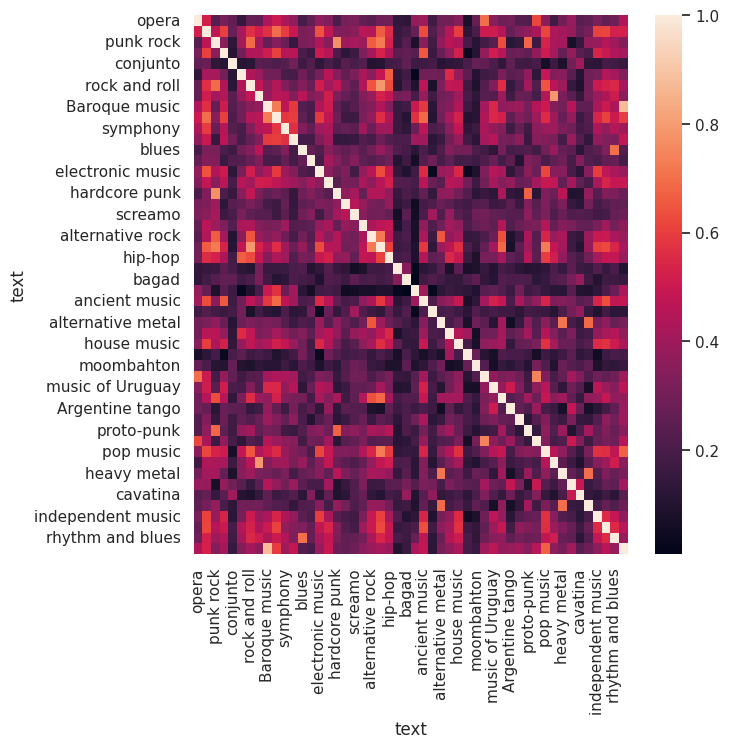

In [16]:
sns.heatmap(similarity_matrix)

Using cosine similarity, we found out that the top 2 genres most similar to Argentine tango are 'music of Uruguay' and 'bachata'!

In [18]:
most_similar_2_genres_to_argentine_tango = similarity_matrix['Argentine tango'].sort_values(ascending=False).head(3)
most_similar_2_genres_to_argentine_tango

,Argentine tango
text,
Argentine tango,1.000000
music of Uruguay,0.505699
bachata,0.483124


In [17]:
most_similar_2_genres_to_argentine_tango = ["Music of Uruguay", "bachata"]

This exercise analyzes the relationships between different music genres using embeddings and UMAP for dimensionality reduction. Starting with a dataset of music genres, it generates numeric embeddings for each genre, visualizes the embeddings in a 2D scatterplot, and calculates pairwise cosine similarities. The analysis identifies the most similar genres to a specific genre, such as "Argentine tango," providing insights into genre similarities and clustering patterns.